# Data Collection
> ## Download the Dataset

# Image Pre-Processing

> ## Importing the Necessary Libraries

In [24]:
import pip  
pip.main(['install', 'imutils'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=c6dc8ebd42a0b89717a9f475b72610c4c09fe44a4d566f2b0276bbc47e90a10f
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/4b/a5/2d/4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


0

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from skimage import feature
from imutils import build_montages
from imutils import paths
import numpy as np
import cv2
import os
import pickle

In [28]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Z-9StvP8aDdlN2Sj75kkV0N2UMIhtxfSn8cNPon4stHx',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'detectingparkinson39sdiseaseusing-donotdelete-pr-gvpamjcnwfgxd1'
object_key = 'dataset1.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
bucket = 'detectingparkinson39sdiseaseusing-donotdelete-pr-gvpamjcnwfgxd1'
object_key = 'dataset1.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [ ]:
sns.set()
os.getcwd()

> ## Loading the training and testing dataset

In [7]:
pwd

'/home/wsuser/work'

In [60]:
import os;
spiral_train_healthy = os.listdir('dataset1/dataset/spiral/training/healthy/')
spiral_train_park = os.listdir('dataset1/dataset/spiral/training/parkinson/')

fp_spiral_train_healthy = 'dataset1/dataset/spiral/training/healthy/'
fp_spiral_train_park = 'dataset1/dataset/spiral/training/parkinson/'

spiral_test_healthy = os.listdir('dataset1/dataset/spiral/testing/healthy/')
spiral_test_park = os.listdir('dataset1/dataset/spiral/testing/parkinson/')

fp_spiral_test_healthy = 'dataset1/dataset/spiral/testing/healthy/'
fp_spiral_test_park = 'dataset1/dataset/spiral/testing/parkinson/'

> ## Quantifying Images

In [54]:
def quantify_image(image):
  features = feature.hog(image,orientations=9,
                pixels_per_cell=(10,10),cells_per_block=(2,2),transform_sqrt=True,block_norm="L1")

  return features

> ## Splitting up of training and testing data

In [55]:
trainX = []
testX = []
outputs = []
trainY = []
testY = []

for i in spiral_train_healthy:
  image = cv2.imread(fp_spiral_train_healthy+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image =cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  trainX.append(features)
  trainY.append('healthy')

for i in spiral_train_park:
  image = cv2.imread(fp_spiral_train_park+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  trainX.append(features)
  trainY.append('parkinson')

for i in spiral_test_healthy:
  image = cv2.imread(fp_spiral_test_healthy+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  testX.append(features)
  testY.append('healthy')

for i in spiral_test_park:
  image = cv2.imread(fp_spiral_test_park+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  testX.append(features)
  testY.append('parkinson')
    

In [62]:
trainX = np.array(trainX)
testX = np.array(testX)
trainY = np.array(trainY)
testY = np.array(testY)
trainX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
trainY

['healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson']

In [63]:
testX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
testY

['healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson']

> ## Label Encoding

In [64]:
le = LabelEncoder()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)
print(trainX.shape,trainY.shape)

(72, 12996) (72,)


In [65]:
trainY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [66]:
testY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

# Model Building

> ## Training the model

In [67]:
print("Training model....")
model = RandomForestClassifier(n_estimators=100)
model.fit(trainX,trainY)

Training model....


RandomForestClassifier()

In [68]:
preds = model.predict(testX)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1])

> ## Testing the Model

In [105]:
testpath=list(paths.list_images(fp_spiral_train_healthy))
idxs=np.arange(0,len(testpath))
idxs=np.random.choice(idxs,size=(25,),replace=False)
images=[]

In [106]:
for i in idxs:
    image=cv2.imread(testpath[i])
    output=image.copy()
    
    #load the input image,convert to grayscale and resize
    
    output=cv2.resize(output,(128,128))
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=cv2.resize(image,(200,200))
    image=cv2.threshold(image,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    
    #quantify the image and make predictions based on the  extracted feature using last trained random forest
    
    features= quantify_image(image)
    preds=model.predict([features])
    label=le.inverse_transform(preds)[0]
    if label=="healthy":
      color=(0,255,0) 
    else:
      color=(0,0,255)
    
    cv2.putText(output,label,(3,20),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)
    images.append(output)
    
#creating a montage
montage=build_montages(images,(128,128),(5,5))[0]
cv2_imshow(montage)
cv2.waitKey(0)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'putText'
> Overload resolution failed:
>  - Can't convert object of type 'numpy.int64' to 'str' for 'text'
>  - Can't convert object of type 'numpy.int64' to 'str' for 'text'


In [ ]:
'''montage = build_montages(images,(128,128),(5,5))[0]
cv2.imshow(montage)
cv2.waitKey(0)'''

montage=build_montages(images,(128,128),(5,5))[0]
cv2_imshow(montage)
cv2.waitKey(0)


> ## Predicting the model-Accuracy and Confusion Matrix

In [ ]:
predictions = model.predict(testX)

cm = confusion_matrix(testY, predictions).flatten()
print(cm)
(tn, fp, fn, tp) = cm
accuracy = (tp + tn) / float(cm.sum())
print(accuracy)


> ## Model Evaluation

In [69]:
cnf = confusion_matrix(testY,preds)
cnf

array([[14,  1],
       [ 3, 12]])

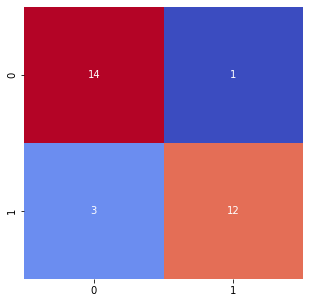

In [70]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf , annot=True , cmap="coolwarm" , cbar=False)
plt.show()

In [72]:
acc = accuracy_score(testY,preds)
acc

0.8666666666666667

In [73]:
cr = classification_report(testY, preds)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.92      0.80      0.86        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



In [74]:
indexes = np.random.randint(0,30,25)
indexes

array([19, 17, 18,  4, 12, 22, 26, 16,  3, 21,  7, 23,  1, 16,  7, 11, 19,
        7, 18, 20, 13,  7,  9, 16, 24])

# save the model

In [76]:
pickle.dump(model,open('parkinson.pkl','wb'))

# Deployment

In [77]:
!pip install -U ibm-watson-machine-learning

In [78]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

# Authenticate 

In [80]:
wml_credentials = {
    "apikey" : "RYa2JTvIsfgzBUbvFxnCYVUxLBDntmTWzc9KGStjRtC5",
    "url" : "https://us-south.ml.cloud.ibm.com" #For Dallas region
}

In [82]:
wml_client =APIClient(wml_credentials)

Client successfully initialized


In [83]:
# Check the available deployments

wml_client.spaces.list()

Successfully finished spaces for url: 'https://api.dataplatform.cloud.ibm.com/v2/spaces?limit=50'
Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------------------  ------------------------
ID                                    NAME                       CREATED
efa48345-def9-4aa5-b19f-4dd7d5f766ce  ParkinsonDiseaseDetection  2022-11-06T10:09:49.894Z
------------------------------------  -------------------------  ------------------------


In [84]:
SPACE_ID = "efa48345-def9-4aa5-b19f-4dd7d5f766ce"

In [85]:
# Space id created default one

wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [86]:
# To check the environment

wml_client.software_specifications.list()

Successfully finished list sw_specs for url: 'https://api.dataplatform.cloud.ibm.com/v2/software_specifications?version=2021-06-24&space_id=efa48345-def9-4aa5-b19f-4dd7d5f766ce'
Successfully finished list assets for url: 'https://api.dataplatform.cloud.ibm.com/v2/software_specifications?version=2021-06-24&space_id=efa48345-def9-4aa5-b19f-4dd7d5f766ce'
-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd

# save and deploy

In [87]:
import sklearn
sklearn.__version__

'1.0.2'

In [88]:
MODEL_NAME = "ParkinsonDiseaseDetection_DeployedModel"
DEPLOYMENT_NAME = "ParkinsonDiseaseDetection"
DEMO_MODEL = model

In [89]:
# Set Python default version

software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

Successfully finished list assets for url: 'https://api.dataplatform.cloud.ibm.com/v2/software_specifications?version=2021-06-24&space_id=efa48345-def9-4aa5-b19f-4dd7d5f766ce&name=runtime-22.1-py3.9'
Successfully finished list assets for url: 'https://api.dataplatform.cloud.ibm.com/v2/software_specifications?version=2021-06-24&space_id=efa48345-def9-4aa5-b19f-4dd7d5f766ce&name=runtime-22.1-py3.9'


# Create Model Properties to deploy the model

In [90]:
# Setup Model Meta

model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

In [93]:
# Save Model

model_details = wml_client.repository.store_model( 
    model = DEMO_MODEL,
    meta_props = model_props,
    training_data = X_train,
    training_target = y_train
)

In case , where space_id is passed.
Successfully finished getting models details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/models/9845f4bf-8b3c-46a9-9558-848e6bc872f2?version=2021-06-24&space_id=efa48345-def9-4aa5-b19f-4dd7d5f766ce'


In [94]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'},
      {'name': 'f7', 'type': 'float'},
      {'name': 'f8', 'type': 'float'},
      {'name': 'f9', 'type': 'float'},
      {'name': 'f10', 'type': 'float'},
      {'name': 'f11', 'type': 'float'},
      {'name': 'f12', 'type': 'float'},
      {'name': 'f13', 'type': 'float'},
      {'name': 'f14', 'type': 'float'},
      {'name': 'f15', 'type': 'float'},
      {'name': 'f16', 'type': 'float'},
      {'name': 'f17', 'type': 'float'},
      {'name': 'f18', 'type': 'float'},
      {'name': 'f19', 'type': 'float'},
      {'name': 'f20', 'type': 'float'},
      {'name': 'f21', 'type': 'float'},
      {'name': 'f22', 'typ

In [95]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'9845f4bf-8b3c-46a9-9558-848e6bc872f2'

In [96]:
# Download the model locally

wml_client.repository.download('3b61cc71-62c2-49c2-bb62-2e2278dfd11b','Deployed_Model.tar.gz')

Successfully finished get model for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/models/3b61cc71-62c2-49c2-bb62-2e2278dfd11b?version=2021-06-24&space_id=efa48345-def9-4aa5-b19f-4dd7d5f766ce'
Successfully downloaded artifact with artifact_url: https://us-south.ml.cloud.ibm.com/ml/v4/models/3b61cc71-62c2-49c2-bb62-2e2278dfd11b
Successfully saved model content to file: 'Deployed_Model.tar.gz'


'/home/wsuser/work/Deployed_Model.tar.gz'

> ## Save the Model

In [ ]:
pickle.dump(model,open('parkinson.pkl','wb')) 